In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Analyzing Total Energy Consumption by State per Sector

In [2]:
#Pull up Residential Energy Consumption throughout 50 states (including USA totals) dataframe from CSV file
df_res = pd.read_csv ("../Resources/Residential_Energy_Consumption.csv")
df_res

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,386066,384310,372753,367777,379696,360336,380174,6007893
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,59556,53524,55874,52810,52028,54045,50780,850121
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,383046,367317,356054,345614,333695,340074,332073,5910874
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,224542,232994,214193,217225,224615,220830,224902,3694788
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,1488574,1449101,1489320,1455716,1425659,1417985,1426721,23170589
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,327996,329965,313885,324134,323517,307532,298492,5361968
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,256700,286930,298534,298395,261825,263260,271535,4179209
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,63315,70499,67820,69380,67959,61557,63432,1068684
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,1265230,1263599,1249670,1257345,1235554,1165291,1162604,19417342
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,711957,713846,716909,680502,659384,623747,657077,11328258


In [3]:
#Pull up Commercial and Industrial Energy Consumption throughout 50 states (including USA totals) dataframe
# from CSV file
df_com = pd.read_csv ('../Resources/Commercial_Energy_Consumption.csv')
print (df_com)

     State     2015     2014     2013     2012     2011     2010     2009  \
0   USA-AL   263457   262497   256750   244919   257067   270504   257060   
1   USA-AK    66983    63219    62922    69598    70816    66822    61825   
2   USA-AZ   347477   342287   349984   343783   347514   333894   332909   
3   USA-AR   179155   182202   176523   170147   174604   174500   164583   
4   USA-CA  1462756  1432703  1430427  1488960  1538314  1510438  1514229   
5   USA-CO   290564   284107   286702   277734   287990   287485   297449   
6   USA-CT   199411   192330   188086   183405   184351   190625   187058   
7   USA-DE    57364    57866    56940    56847    59093    63083    62977   
8   USA-FL  1013873   975609   968255   957462   969582   990021  1007221   
9   USA-GA   551841   549710   531508   537457   564498   581280   551528   
10  USA-HI    41330    41137    40590    39187    41157    40111    40682   
11  USA-ID    88995    86953    88008    83213    85263    82887    84725   

In [4]:
#Pull up Commercial and Industrial Energy Consumption throughout 50 states (including USA totals) dataframe
# from CSV file
df_ind = pd.read_csv ('../Resources/Industrial_Energy_Consumption.csv')
print (df_ind)

     State     2015     2014     2013     2012     2011     2010     2009  \
0   USA-AL   823765   861143   850439   835514   804046   774098   711199   
1   USA-AK   331209   330421   334286   339183   331420   326937   334430   
2   USA-AZ   236211   236530   213634   220120   224978   208272   197015   
3   USA-AR   377764   412848   412235   405144   421820   410689   365081   
4   USA-CA  1849780  1859203  1884895  1747060  1784583  1740127  1713404   
5   USA-CO   440348   431776   415087   421180   421232   455480   414088   
6   USA-CT    78393    85921    88143    83352    86015    88602    87157   
7   USA-DE    89074    87476    90725    92276    85081    50473    58909   
8   USA-FL   491793   466723   479455   473873   478130   501511   466630   
9   USA-GA   779445   781878   752752   726326   754966   758769   707159   
10  USA-HI    64236    64558    65419    65113    67545    68068    69087   
11  USA-ID   174169   178290   177849   180791   178557   181584   167397   

In [5]:
#Merge 3 DataFrames together
df_merged = pd.merge(df_res, df_com, on="State", suffixes=("", "_Com"))
df_merged

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,2008_Com,2007_Com,2006_Com,2005_Com,2004_Com,2003_Com,2002_Com,2001_Com,2000_Com,SubTotal_Com
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,...,271267,276430,268294,260757,257993,249280,250226,243613,250773,4140887
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,...,64441,63076,67572,62403,63451,58567,60184,66274,69873,1038026
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,...,342185,341414,333127,322978,313878,310692,311230,312480,314579,5300411
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,...,166933,162806,158434,163193,153539,153730,151491,150150,146310,2628300
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,...,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275,23701582
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,...,302273,293354,294859,294962,292485,298307,307369,297225,291783,4684648
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,...,195646,211813,195013,207783,207537,225273,209010,214170,220325,3211836
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,...,61607,60347,57891,58749,57214,57000,58139,51981,58864,935962
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,...,1034041,1040386,1033460,1030708,1021070,994939,995300,951670,949471,15933068
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,...,565938,564130,545052,544485,535357,504154,484042,491608,492204,8594792


In [6]:
df_merged_final = pd.merge(df_merged, df_ind, on="State", suffixes=("_Res", "_Ind"))
#df_merged_final = df_merged_final.drop([50])
df_merged_final

,State,2015_Res,2014_Res,2013_Res,2012_Res,2011_Res,2010_Res,2009_Res,2008_Res,2007_Res,...,2008_Ind,2007_Ind,2006_Ind,2005_Ind,2004_Ind,2003_Ind,2002_Ind,2001_Ind,2000_Ind,SubTotal_Ind
0,USA-AL,349230,378853,358238,338290,377607,419277,372781,388024,394481,...,876097,915657,933217,930987,941966,877629,857704,849465,990428,13833354
1,USA-AK,53136,47823,48810,54597,53939,52253,53536,53668,53742,...,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
2,USA-AZ,385477,377963,389450,378865,391384,376625,373842,385383,394012,...,232755,221076,226196,220120,224216,198138,204137,213987,225886,3503271
3,USA-AR,228573,246790,241000,222034,247420,253858,226791,236545,232476,...,421531,440996,441382,431591,435855,444429,456906,447636,476543,6802450
4,USA-CA,1347807,1355062,1440463,1437024,1500559,1466657,1483981,1511586,1474374,...,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271,30229321
5,USA-CO,347377,353334,363327,335025,354262,352304,339585,347873,343360,...,412273,405162,396319,387747,376686,371668,356356,378721,312254,6396377
6,USA-CT,251763,248119,245613,232769,238420,251419,253184,255114,265629,...,81049,107395,111351,118448,116461,122066,107708,114029,124719,1600809
7,USA-DE,65665,66613,64890,62032,67909,72461,68693,68574,67885,...,90123,90639,92197,97921,95307,109899,113831,113066,112954,1469951
8,USA-FL,1207549,1177125,1147013,1128534,1191486,1271713,1223002,1216701,1254926,...,518118,525469,551744,535556,530146,544761,531592,559778,559871,8215150
9,USA-GA,697029,741983,686812,671729,747018,819871,726627,737925,735842,...,777325,853354,881249,886636,919986,884294,931985,845079,911983,13153186


In [7]:
#Create new DataFRame with just subtotals per sector
subtotal_df = df_merged_final[["State", "SubTotal_Res", "SubTotal_Com", "SubTotal_Ind"]]
subtotal_df["Total"]=(subtotal_df["SubTotal_Res"]+subtotal_df["SubTotal_Com"]+subtotal_df["SubTotal_Ind"])
subtotal_df = subtotal_df.sort_values("Total")
subtotal_df

c:\users\mainframe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State,SubTotal_Res,SubTotal_Com,SubTotal_Ind,Total
44,USA-VT,715960,458734,402544,1577238
38,USA-RI,1050695,785946,386924,2223565
10,USA-HI,522476,637866,1098713,2259055
28,USA-NH,1445360,1109885,733086,3288331
7,USA-DE,1068684,935962,1469951,3474597
40,USA-SD,1086823,952357,1835031,3874211
25,USA-MT,1310176,1156888,2282938,4750002
18,USA-ME,1464944,1001218,2458008,4924170
33,USA-ND,1056081,1062109,3758544,5876734
49,USA-WY,717771,942984,4438925,6099680


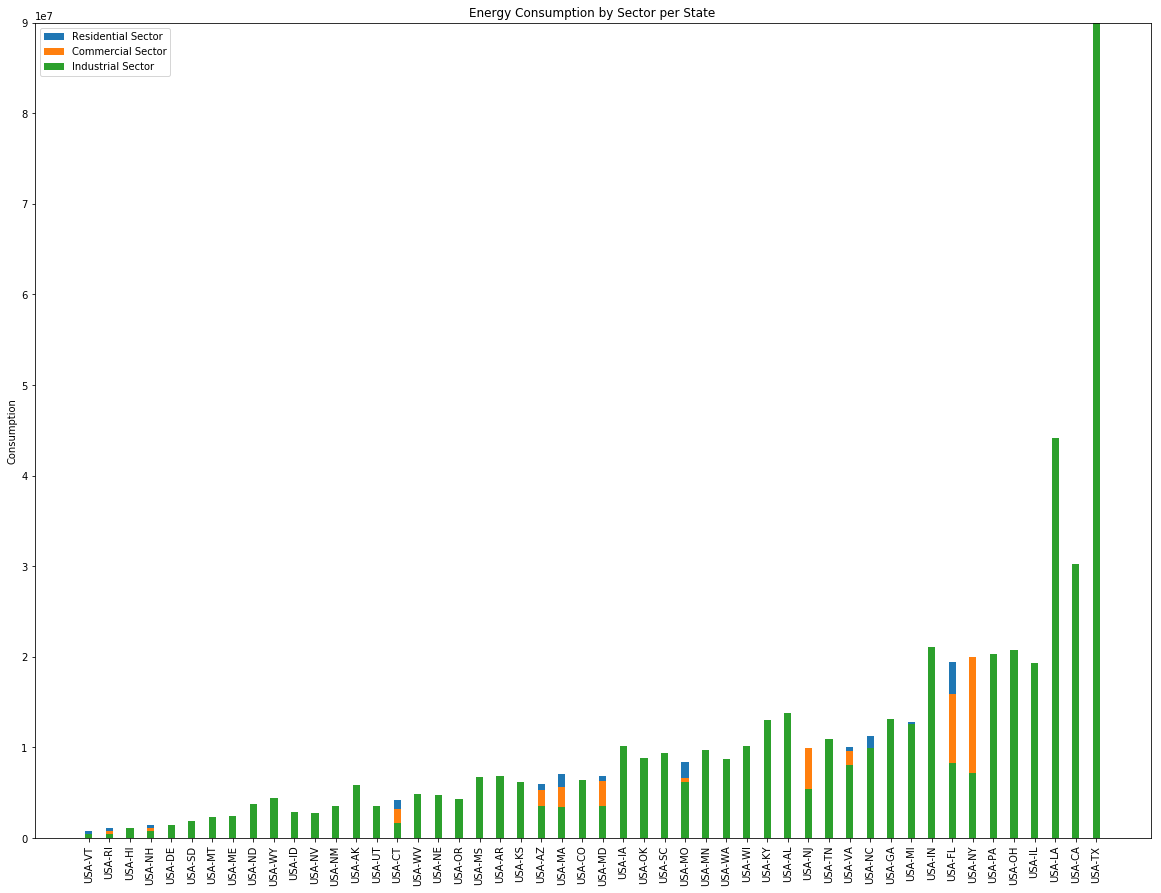

In [8]:
#Create a stacked bar chart to visualize energy consumption by sector per state

plt.figure(figsize=(20,15))

width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Res"], width)
p2 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Com"], width)
p3 = plt.bar(subtotal_df["State"], subtotal_df["SubTotal_Ind"], width)

plt.ylabel('Consumption')
plt.title('Energy Consumption by Sector per State')
plt.xticks(rotation='vertical')
plt.ylim(0,90000000)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Residential Sector', 'Commercial Sector', 'Industrial Sector' ))
#Save the figure
plt.savefig('../Figures/Energy_Consumption_Sector_State.png')
plt.show()

# Total Energy Consumption in the US from 2000 - 2015

In [9]:
#Pull in total energy data files.  Need USA totals, so use the 'uncleaned files'
residential_df = pd.read_csv("../Resources/Residential_Energy_Consumption.csv")
commercial_df = pd.read_csv("../Resources/Commercial_Energy_Consumption.csv")
industrial_df = pd.read_csv("../Resources/Industrial_Energy_Consumption.csv")

In [10]:
#Set State column as Index
residential_df.set_index("State", inplace = True)
commercial_df.set_index("State", inplace = True)
industrial_df.set_index("State", inplace = True)

In [11]:
#Get residential energy consumption from residential
res_US = residential_df.loc[residential_df.index == "USA"]
res_US_T = res_US.T
res_US_T.sort_index(inplace = True,ascending=True)
res_US_T

State
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


In [12]:
#Get commercial energy consumption from USA
com_US = commercial_df.loc[commercial_df.index == "USA"]
com_US_T = com_US.T
com_US_T.sort_index(inplace = True,ascending=True)
com_US_T

State
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


In [13]:
#Combine the two dataframes
combined_df = pd.merge(res_US_T, com_US_T, left_index = True, right_index = True)
combined_df

State
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


In [14]:
#Get industrial energy from USA
ind_US = industrial_df.loc[industrial_df.index == "USA"]
ind_US_T = ind_US.T
ind_US_T.sort_index(inplace = True,ascending=True)
ind_US_T

State
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


In [15]:
#Merge data frames
combined_df = pd.merge(combined_df, ind_US_T, left_index = True, right_index = True)
final_combined_df= combined_df.rename(columns = {'USA_x': 'Total Residential', "USA_y":"Total Commercial", "USA": "Total Industrial"})
final_combined_df

State
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


In [16]:
#Sum up the individual sectors to get total consumption
final_combined_df["Total Consumption"] = final_combined_df["Total Residential"] + final_combined_df["Total Commercial"] + final_combined_df["Total Industrial"]

final_combined_df

KeyError: 'Total Residential'

In [ ]:
final_combined_df.describe()

In [ ]:
final_combined_df.plot(kind = "line", title = "Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("Figures/Fig1.png")
plt.show()

In [ ]:
total_consumption = final_combined_df["Total Consumption"]

total_consumption.plot(kind="line", title ="Total Energy Consumption Across Three Sectors", color = 'r')
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("Figures/Fig2.png")
plt.show()

In [ ]:
sectors_combined_df = final_combined_df.drop(columns = ['Total Consumption'])
sectors_combined_df.plot(kind="line", title ="Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("Figures/Fig4.png")
plt.show()

In [ ]:
sectors_combined_df["Total Residential"] /= 1000000
sectors_combined_df["Total Commercial"] /= 1000000
sectors_combined_df["Total Industrial"] /= 1000000
sectors_combined_df

In [ ]:
sectors_combined_df.plot(kind = "area", title = "Total Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs x10^6)")
plt.savefig("Figures/tot_energy_area.png")
plt.show()

In [ ]:
#Pie chart
residential_sum = final_combined_df["Total Residential"].sum()
commercial_sum =final_combined_df["Total Commercial"].sum()
industrial_sum = final_combined_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [residential_sum, commercial_sum, industrial_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to Total Energy Consumption in the USA")
plt.axis("equal")
plt.savefig("Figures/Fig5.png")
plt.show()

# CO2 Emissions

In [ ]:
#Get data from csv files
co2_residential_df = pd.read_csv("../Resources/residential_c02.csv")
co2_commercial_df = pd.read_csv("../Resources/commercial_c02.csv")
co2_industrial_df = pd.read_csv("../Resources/industrial_c02.csv")

In [ ]:
co2_commercial_df.dtypes

In [ ]:
#Set 'States' as index
co2_residential_df.set_index("States", inplace = True)
co2_commercial_df.set_index("States", inplace = True)
co2_industrial_df.set_index("States", inplace = True)

#Sum values over each year column
sum_co2_residential = co2_residential_df.sum(axis=0)
sum_co2_commercial = co2_commercial_df.sum(axis=0)
sum_co2_industrial = co2_industrial_df.sum(axis=0)

In [ ]:
years = list(co2_residential_df.columns)
combined_em_df = pd.DataFrame({"Total Residential": sum_co2_residential,
                           "Total Commercial": sum_co2_commercial,
                           "Total Industrial": sum_co2_industrial})
combined_em_df["Total Emissions"] = combined_em_df["Total Residential"] + combined_em_df["Total Commercial"] + combined_em_df["Total Industrial"]
combined_em_df.dropna(inplace = True)
combined_em_df.dtypes

In [ ]:
combined_em_df.plot(kind = "line", title = "Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("Figures/Fig6.png")
plt.show()

In [ ]:
total_emissions = combined_em_df["Total Emissions"]

total_emissions.plot(kind="line", title ="Total CO2 Emissions", color = 'r')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("Figures/Fig7.png")
plt.show()

In [ ]:
em_sectors_combined_df = combined_em_df.drop(columns = ['Total Emissions'])
em_sectors_combined_df.plot(kind="line", title ="Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("Figures/Fig8.png")
plt.show()

In [ ]:
em_sectors_combined_df = combined_em_df.drop(columns = ['Total Emissions'])
em_sectors_combined_df.plot(kind="area", title ="Total CO2 Emissions Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (million metric tons C02)")
plt.savefig("Figures/Fig9.png")
plt.show()

In [ ]:
#Pie chart
em_residential_sum = combined_em_df["Total Residential"].sum()
em_commercial_sum =combined_em_df["Total Commercial"].sum()
em_industrial_sum = combined_em_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [em_residential_sum, em_commercial_sum, em_industrial_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to CO2 Emissions in the USA")
plt.axis("equal")
plt.savefig("Figures/Fig10.png")
plt.show()

# Total Energy Consumption and CO2 emission relationships

In [ ]:
#Create df for scatter plot
total_energy_co2_df = pd.DataFrame({"Total Consumption": total_consumption, "Total Emissions": total_emissions})

In [ ]:
total_energy_co2_df.plot(kind = "scatter", x="Total Consumption", y="Total Emissions", title = "CO2 Emissions by Total Energy Consumption")
plt.show()

In [ ]:
#import lineregress
from scipy.stats import linregress

In [ ]:
x_values = total_energy_co2_df['Total Consumption']
y_values = total_energy_co2_df['Total Emissions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") #red solid line
plt.annotate(line_eq,(69729825,1420),fontsize=15,color="red")
plt.xlabel('Total Energy Consumption')
plt.ylabel('Total CO2 emissions')
plt.ylim(1400, 1750)
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The actual slope is: {slope}")
plt.savefig("Figures/Fig11.png")
plt.show()

In [ ]:
x_values = total_energy_co2_df['Total Consumption']/1000000
y_values = total_energy_co2_df['Total Emissions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-") #red solid line
plt.annotate(line_eq,(69,1420),fontsize=15,color="red")
plt.xlabel('Total Energy Consumption (Billion BTU x 10^6)')
plt.ylabel('Total CO2 emissions')
rsquare = round(rvalue**2,2)
plt.annotate(f"r-squared = {rsquare}", (67.5,1700), fontsize=12)
#plt.ylim(1400, 1750)
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.savefig("Figures/totenergy_co2_regress.png")
plt.show()

# Solar Energy Consumption

In [ ]:
#Pull in solar energy data files.  Need USA totals, so use the 'uncleaned files'
residential_solar_df = pd.read_csv("../Resources/residential_solar_data.csv")
commercial_solar_df = pd.read_csv("../Resources/commercial_solar_data.csv")
industrial_solar_df = pd.read_csv("../Resources/industrial_solar_data.csv")

In [ ]:
#Set State column as Index
residential_solar_df.set_index("State", inplace = True)
commercial_solar_df.set_index("State", inplace = True)
industrial_solar_df.set_index("State", inplace = True)

In [ ]:
res_solar_US = residential_solar_df.loc[residential_solar_df.index == "USA"]
res_solar_US_T = res_solar_US.T
res_solar_US_T.sort_index(inplace = True,ascending=True)
res_solar_US_T

In [ ]:
#Get commercial energy consumption from USA
com_solar_US = commercial_solar_df.loc[commercial_solar_df.index == "USA"]
com_solar_US_T = com_solar_US.T
com_solar_US_T.sort_index(inplace = True,ascending=True)
com_solar_US_T

In [ ]:
#Get industrial energy from USA
ind_solar_US = industrial_solar_df.loc[industrial_solar_df.index == "USA"]
ind_solar_US_T = ind_solar_US.T
ind_solar_US_T.sort_index(inplace = True,ascending=True)
ind_solar_US_T

In [ ]:
#Combine the two dataframes
combined_solar_df = pd.merge(res_solar_US_T, com_solar_US_T, left_index = True, right_index = True)
combined_solar_df

In [ ]:
#Merge data frames
combined_solar_df = pd.merge(combined_solar_df, ind_solar_US_T, left_index = True, right_index = True)
final_combined_solar_df= combined_solar_df.rename(columns = {'USA_x': 'Total Residential', "USA_y":"Total Commercial", "USA": "Total Industrial"})
final_combined_solar_df.drop(["2016","2017","2018"], inplace = True)
final_combined_solar_df

In [ ]:
final_combined_solar_df.plot(kind="area", title ="Total Solar Energy Consumption Across Three Sectors",)
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("Figures/solar_area.png", bbox_inches = "tight")

plt.show()

In [ ]:
final_combined_solar_df.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("Figures/Fig13.png")
plt.show()

In [ ]:
#Sum up the individual sectors to get total consumption
total_combined_solar_df = final_combined_solar_df.copy()
total_combined_solar_df["Total Consumption"] = total_combined_solar_df["Total Residential"] + total_combined_solar_df["Total Commercial"] + total_combined_solar_df["Total Industrial"]
total_combined_solar_df

In [ ]:
total_combined_solar_df.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors")
plt.xlabel("Year")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("Figures/Fig14.png")
plt.show()

In [ ]:
total_solar_consumption = total_combined_solar_df["Total Consumption"]

total_consumption.plot(kind="line", title ="Total Solar Energy Consumption Across Three Sectors", color = 'r')
plt.xlabel("Year")
plt.ylabel("Consumption (Billion BTUs)")
plt.savefig("Figures/Fig15.png")
plt.show()

In [ ]:
#Pie chart
residential_solar_sum = final_combined_solar_df["Total Residential"].sum()
commercial_solar_sum =final_combined_solar_df["Total Commercial"].sum()
industrial_solar_sum = final_combined_solar_df["Total Industrial"].sum()

# Labels for the sections of our pie chart
labels = ["Residential", "Commercial", "Industrial"]

# The values of each section of the pie chart
sizes = [residential_solar_sum, commercial_solar_sum, industrial_solar_sum]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sectors Contributing to Solar Energy Consumption in the USA")
plt.axis("equal")
plt.savefig("Figures/Fig16.png")
plt.show()

# Solar Energy Consumption Across the 50 States

In [ ]:
st_residential_solar_df = pd.read_csv("../Resources/cleaned_solar_residential.csv")
st_commercial_solar_df = pd.read_csv("../Resources/cleaned_solar_commercial.csv")
st_industrial_solar_df = pd.read_csv("../Resources/cleaned_solar_industrial.csv")

In [ ]:
#st_residential_solar_df.set_index("State", inplace = True)

st_residential_solar_df
list(st_residential_solar_df.columns)
cleaned_st_residential_solar_df = st_residential_solar_df.drop(columns = ["Unnamed: 0"])
cleaned_st_residential_solar_df

In [ ]:
#Focus on residential since it makes up ~80% of the consumption
df=cleaned_st_residential_solar_df[["2000","2001", "2002","2003","2004","2005", "2006","2007","2008", "2009","2010",
                                 "2011","2012", "2013","2014","2015"]]
boxplot = df.boxplot(figsize=[15.0, 6.0])

plt.title("Distribution of Solar Energy Consumpton per State form 2000-2015")
plt.ylabel("Solar Energy Consumption (Billion BTU)")
plt.savefig("Figures/Fig17.png")
plt.show()

In [ ]:
df["2015"].sort_values(ascending = False)
#three highest states = CA, FL, AZ
#three lowest states = AK, SD, ND

In [ ]:
df["2015"].median()
#three states around median are: 43 (UT),9(GA),45(VT)

# Analysis of the 3 States with the Highest and Lowest Solar Energy Consumption

In [ ]:
#Pull in total energy data files
residential_df = pd.read_csv("../Resources/cleaned_Residential_Energy.csv")
commercial_df = pd.read_csv("../Resources/cleaned_Commercial_Energy.csv")
industrial_df = pd.read_csv("../Resources/cleaned_Industrial_Energy.csv")

In [ ]:
residential_df.drop(columns=["Unnamed: 0"], inplace = True)
commercial_df.drop(columns=["Unnamed: 0"], inplace = True)
industrial_df.drop(columns=["Unnamed: 0"], inplace = True)

In [ ]:
#Set State column as Index
residential_df.set_index("State", inplace = True)
commercial_df.set_index("State", inplace = True)
industrial_df.set_index("State", inplace = True)

In [ ]:
#Transpose Data
t_residential_df = residential_df.T
t_commercial_df = commercial_df.T
t_industrial_df = industrial_df.T

In [ ]:
t_residential_df.sort_index(inplace = True,ascending=True)
t_commercial_df.sort_index(inplace = True,ascending=True)
t_industrial_df.sort_index(inplace = True,ascending=True)

In [ ]:
t_industrial_df

#3 highest states = CA, FL, AZ
#3 lowest states = AK, SD, ND

## Analysis of the 3 States with Highest Solar Energy Consumption (CA, FL, AZ)

In [ ]:
CA_res = t_residential_df["USA-CA"]
CA_com = t_commercial_df["USA-CA"]
CA_ind = t_industrial_df["USA-CA"]

In [ ]:
CA_combined = pd.merge(CA_res, CA_com, left_index = True, right_index = True)
CA_final = pd.merge(CA_combined, CA_ind,left_index = True, right_index = True)
CA_final.columns = ["Residential", "Commercial", "Industrial"]
CA_final["Total Consumption"] = CA_final.sum(axis = 1)
CA_final

In [ ]:
co2_residential_df = pd.read_csv("../Resources/residential_c02.csv")
co2_commercial_df = pd.read_csv("../Resources/commercial_c02.csv")
co2_industrial_df = pd.read_csv("../Resources/industrial_c02.csv")

In [ ]:
#Set 'States' as index
co2_residential_df.set_index("States", inplace = True)
co2_commercial_df.set_index("States", inplace = True)
co2_industrial_df.set_index("States", inplace = True)

In [ ]:
#Transpose dfs
t_co2_residential_df = co2_residential_df.T
t_co2_commercial_df =co2_commercial_df.T
t_co2_industrial_df = co2_industrial_df.T

In [ ]:
CA_co2_res = t_co2_residential_df["CA"]
CA_co2_com = t_co2_commercial_df["CA"]
CA_co2_ind = t_co2_industrial_df["CA"]

In [ ]:
CA_co2_combined = pd.merge(CA_co2_res, CA_co2_com, left_index = True, right_index = True)
CA_co2_final = pd.merge(CA_co2_combined, CA_co2_ind,left_index = True, right_index = True)
CA_co2_final.columns = ["Residential", "Commercial", "Industrial"]
CA_co2_final["Total Emissions"] = CA_co2_final.sum(axis = 1)
CA_co2_final

In [ ]:
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {round(rvalue**2,3)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq, rvalue

In [ ]:
CA_x = CA_final["Total Consumption"]/100000
CA=regression(CA_x, CA_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in CA")
plt.xlabel('Total Energy Consumption (Billon BTU x 10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(CA[0],(48,105.5),fontsize=15,color="red")
rsquare = round(CA[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (46.6,114), fontsize=12)
plt.savefig("../Figures/CA_regress.png")
plt.show()

In [ ]:
FL_res = t_residential_df["USA-FL"]
FL_com = t_commercial_df["USA-FL"]
FL_ind = t_industrial_df["USA-FL"]
FL_combined = pd.merge(FL_res, FL_com, left_index = True, right_index = True)
FL_final = pd.merge(FL_combined, FL_ind,left_index = True, right_index = True)
FL_final.columns = ["Residential", "Commercial", "Industrial"]
FL_final["Total Consumption"] = FL_final.sum(axis = 1)
FL_final

In [ ]:
FL_co2_res = t_co2_residential_df["FL"]
FL_co2_com = t_co2_commercial_df["FL"]
FL_co2_ind = t_co2_industrial_df["FL"]

FL_co2_combined = pd.merge(FL_co2_res, FL_co2_com, left_index = True, right_index = True)
FL_co2_final = pd.merge(FL_co2_combined, FL_co2_ind,left_index = True, right_index = True)
FL_co2_final.columns = ["Residential", "Commercial", "Industrial"]
FL_co2_final["Total Emissions"] = FL_co2_final.sum(axis = 1)
FL_co2_final

In [ ]:
FL_x = FL_final["Total Consumption"]/1000000
FL=regression(FL_x, FL_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in FL")
plt.xlabel('Total Energy Consumption (billion BTU x 10^6)')
plt.ylabel('Total CO2 Emissions (million tons CO2)')
plt.annotate(FL[0],(2.72,15.5),fontsize=15,color="red")
rsquare = round(FL[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (2.55,19.5), fontsize=12)
plt.savefig("../Figures/FL_reg.png")
plt.show()

In [ ]:
AZ_res = t_residential_df["USA-AZ"]
AZ_com = t_commercial_df["USA-AZ"]
AZ_ind = t_industrial_df["USA-AZ"]
AZ_combined = pd.merge(AZ_res, AZ_com, left_index = True, right_index = True)
AZ_final = pd.merge(AZ_combined, AZ_ind,left_index = True, right_index = True)
AZ_final.columns = ["Residential", "Commercial", "Industrial"]
AZ_final["Total Consumption"] = AZ_final.sum(axis = 1)
AZ_final

In [ ]:
AZ_co2_res = t_co2_residential_df["AZ"]
AZ_co2_com = t_co2_commercial_df["AZ"]
AZ_co2_ind = t_co2_industrial_df["AZ"]

AZ_co2_combined = pd.merge(AZ_co2_res, AZ_co2_com, left_index = True, right_index = True)
AZ_co2_final = pd.merge(AZ_co2_combined, AZ_co2_ind,left_index = True, right_index = True)
AZ_co2_final.columns = ["Residential", "Commercial", "Industrial"]
AZ_co2_final["Total Emissions"] = AZ_co2_final.sum(axis = 1)
AZ_co2_final

In [ ]:
AZ_x = AZ_final["Total Consumption"]/1000000
AZ=regression(AZ_x, AZ_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in AZ")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(AZ[0],(0.9,7.8),fontsize=15,color="red")
rsquare = round(AZ[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.86,9.5), fontsize=12)
plt.savefig("../Figures/AZ_reg.png")
plt.show()

r-squared USA total = 0.52 CA r-squared = 0.4952 FL r-squared = 0.205 AZ r-squared = 0.46 For the 3 states with the highest solar energy consumption, their r2 is < that for all of USA (although CA and AZ probably aren't significantly different).

## Analysis of the 3 States with Lowest Solar Energy Consumption (AK, SD, ND)

In [ ]:
AK_res = t_residential_df["USA-AK"]
AK_com = t_commercial_df["USA-AK"]
AK_ind = t_industrial_df["USA-AK"]
AK_combined = pd.merge(AK_res, AK_com, left_index = True, right_index = True)
AK_final = pd.merge(AK_combined, AK_ind,left_index = True, right_index = True)
AK_final.columns = ["Residential", "Commercial", "Industrial"]
AK_final["Total Consumption"] = AK_final.sum(axis = 1)
AK_final

In [ ]:
AK_co2_res = t_co2_residential_df["AK"]
AK_co2_com = t_co2_commercial_df["AK"]
AK_co2_ind = t_co2_industrial_df["AK"]

AK_co2_combined = pd.merge(AK_co2_res, AK_co2_com, left_index = True, right_index = True)
AK_co2_final = pd.merge(AK_co2_combined, AK_co2_ind,left_index = True, right_index = True)
AK_co2_final.columns = ["Residential", "Commercial", "Industrial"]
AK_co2_final["Total Emissions"] = AK_co2_final.sum(axis = 1)
AK_co2_final

In [ ]:
AK_x = AK_final["Total Consumption"]/1000000
AK=regression(AK_x, AK_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in AK")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(AK[0],(0.48,21),fontsize=15,color="red")
rsquare = round(AK[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.44,25), fontsize=12)
plt.savefig("../Figures/AK_reg.png")
plt.show()

In [ ]:
SD_res = t_residential_df["USA-SD"]
SD_com = t_commercial_df["USA-SD"]
SD_ind = t_industrial_df["USA-SD"]
SD_combined = pd.merge(SD_res, SD_com, left_index = True, right_index = True)
SD_final = pd.merge(SD_combined, SD_ind,left_index = True, right_index = True)
SD_final.columns = ["Residential", "Commercial", "Industrial"]
SD_final["Total Consumption"] = SD_final.sum(axis = 1)
SD_final

In [ ]:
SD_co2_res = t_co2_residential_df["SD"]
SD_co2_com = t_co2_commercial_df["SD"]
SD_co2_ind = t_co2_industrial_df["SD"]

SD_co2_combined = pd.merge(SD_co2_res, SD_co2_com, left_index = True, right_index = True)
SD_co2_final = pd.merge(SD_co2_combined, SD_co2_ind,left_index = True, right_index = True)
SD_co2_final.columns = ["Residential", "Commercial", "Industrial"]
SD_co2_final["Total Emissions"] = SD_co2_final.sum(axis = 1)
SD_co2_final

In [ ]:
SD_x=SD_final["Total Consumption"]/1000000
SD=regression(SD_x, SD_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in SD")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(SD[0],(0.24,3.8),fontsize=15,color="red")
rsquare = round(SD[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.18,5.5), fontsize=12)
plt.savefig("../Figures/SD_reg.png")
plt.show()

In [ ]:
ND_res = t_residential_df["USA-ND"]
ND_com = t_commercial_df["USA-ND"]
ND_ind = t_industrial_df["USA-ND"]
ND_combined = pd.merge(ND_res, ND_com, left_index = True, right_index = True)
ND_final = pd.merge(ND_combined, ND_ind,left_index = True, right_index = True)
ND_final.columns = ["Residential", "Commercial", "Industrial"]
ND_final["Total Consumption"] = ND_final.sum(axis = 1)
ND_final

In [ ]:
ND_co2_res = t_co2_residential_df["ND"]
ND_co2_com = t_co2_commercial_df["ND"]
ND_co2_ind = t_co2_industrial_df["ND"]

ND_co2_combined = pd.merge(ND_co2_res, ND_co2_com, left_index = True, right_index = True)
ND_co2_final = pd.merge(ND_co2_combined, ND_co2_ind,left_index = True, right_index = True)
ND_co2_final.columns = ["Residential", "Commercial", "Industrial"]
ND_co2_final["Total Emissions"] = ND_co2_final.sum(axis = 1)
ND_co2_final

In [ ]:
ND_x = ND_final["Total Consumption"]/1000000
ND=regression(ND_x, ND_co2_final["Total Emissions"])
plt.title("CO2 emission by Total Energy Consumption in ND")
plt.xlabel('Total Energy Consumption (billion BTU x10^6)')
plt.ylabel('Total CO2 emissions (million tons CO2)')
plt.annotate(ND[0],(0.40,14),fontsize=15,color="red")
rsquare = round(ND[1]**2,3)
plt.annotate(f"r-squared = {rsquare}", (0.31,19), fontsize=12)                  
plt.savefig("../Figures/ND_reg.png")
plt.show()

r-squared for US = 0.52 r-squared for AK = 0.98 r-squared for SD = 0.789 r-squared for ND = 0.96 For the three states with the lowest solar energy consumption, the r-squared for CO2 emissions by Total Energy Consumption are very high (0.79 -0.98), suggesting that the regression models for these states account for the majority of the variance in the data observed.

Taken together, the regression models suggest that in states with the lowest solar energy consumption, the variability in CO2 emissions is mostly accounted for by the total energy consumption in that state. In states with the hightest solar energy consumption, the variablity in CO2 emissions is inadequately accounted for by total energy consumption.

In [ ]:
#VT_final

In [ ]:
#VT_final["Res %"] = VT_final["Total Consumption"]/VT_final["Residential"]
#VT_final

# Further CO2 Analysis

In [ ]:
#Total Carbon Dioxide Emissions, all fuels, in millions metric tons
commercial = pd.read_csv('../Resources/commercial_c02.csv')
industrial = pd.read_csv('../Resources/industrial_c02.csv')
residential = pd.read_csv('../Resources/residential_c02.csv')

In [ ]:
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
compare_dict = {'Commercial': [commercial['2000'].sum(),commercial['2001'].sum(),commercial['2002'].sum(),
                       commercial['2003'].sum(),commercial['2004'].sum(),commercial['2005'].sum(),
                       commercial['2004'].sum(),commercial['2007'].sum(),commercial['2008'].sum(),
                       commercial['2009'].sum(),commercial['2010'].sum(),commercial['2011'].sum(),
                       commercial['2012'].sum(),commercial['2013'].sum(),commercial['2014'].sum(),
                        commercial['2015'].sum()],
       'Industrial' : [industrial['2000'].sum(),industrial['2001'].sum(),industrial['2002'].sum(),
                       industrial['2003'].sum(),industrial['2004'].sum(),industrial['2005'].sum(),
                       industrial['2004'].sum(),industrial['2007'].sum(),industrial['2008'].sum(),
                       industrial['2009'].sum(),industrial['2010'].sum(),industrial['2011'].sum(),
                       industrial['2012'].sum(),industrial['2013'].sum(),industrial['2014'].sum(),
                          industrial['2015'].sum()],
       'Residential' :[residential['2000'].sum(),residential['2001'].sum(),residential['2002'].sum(),
                       residential['2003'].sum(),residential['2004'].sum(),residential['2005'].sum(),
                       residential['2004'].sum(),residential['2007'].sum(),residential['2008'].sum(),
                       residential['2009'].sum(),residential['2010'].sum(),residential['2011'].sum(),
                       residential['2012'].sum(),residential['2013'].sum(),residential['2014'].sum(),
                          residential['2015'].sum()],
               'Year': years}

all_df = pd.DataFrame(data = compare_dict).reset_index()
all_df['Total'] = all_df['Commercial'] + all_df['Industrial'] + all_df['Residential']
all_df

In [ ]:
#plt.plot(all_df['Year'],all_df['Commercial'])
#plt.plot(all_df['Year'],all_df['Industrial'], color = 'r')
plt.plot(all_df['Year'],all_df['Total'], color = 'b')
plt.ylim(1000,2000)
plt.show()

In [ ]:
commercial

In [ ]:
residential